# 3.8 통계적 가설 검정
## 표본을 통해 모집단에 대한 통계적 "판단"을 내리는 방법
## 판단의 기준으로 확률적인 표현을 사용하는 것이 특징

### 추정: 
### – 표본 통계량을 이용하여 모집단 모수의 실제 값 추측

### 검정: 
### – 모수가 어떤 값을 갖는다는 주장을 하고
### 통계적으로 얼마나 신뢰할 수 있는지 확인

## 1 변량 데이터의 t 검정

### 대상 : 평균
### • 판단할 것 : 평균 값이 "어떤 값" 과 다르다고 말할 수 있는지 여부

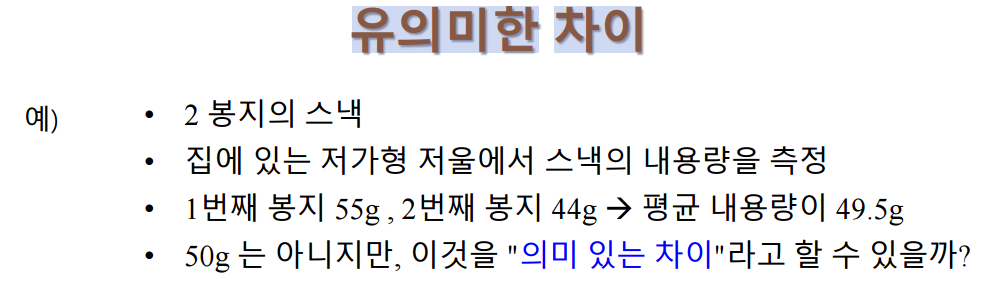

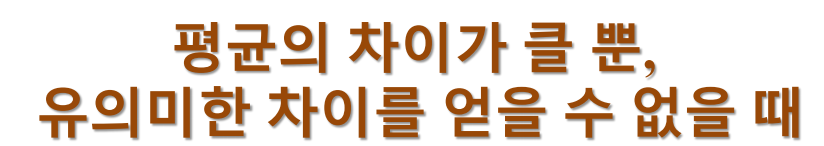
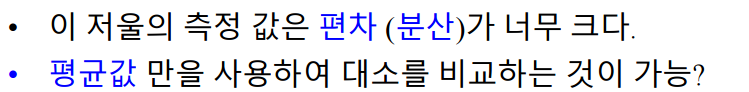

## t 검증의 3요소

### • 샘플이 충분히 확보되어야한다.
### • 분산이 작아야한.
### • 평균의 차이가 커야한다.

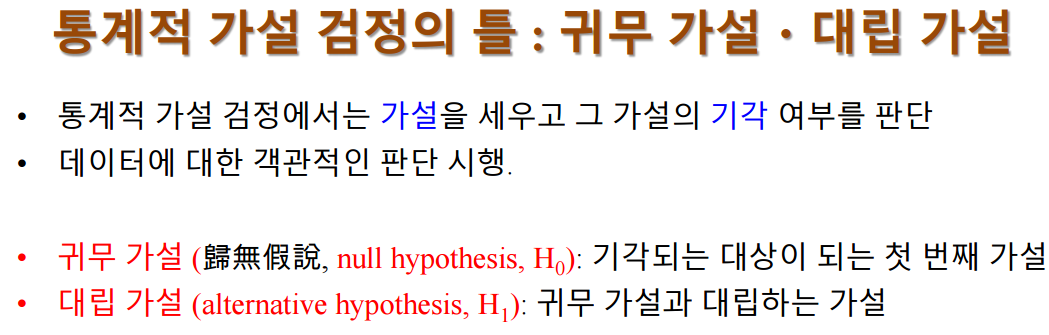

## p-값

### 표본과 귀무 가설 간의 모순을 나타내는 지표
### p값이 작을 수록 귀무가설과 표본이 모순된다 생각함.
### p값은 확률로 표현됨.
### p 값도 신뢰 구간과 마찬가지로 똑같은 조건에서 표본을 많이 추출 ~t 값을 계산을 반복하여 구한 확률을 해석함.


## 유의 수준
### 귀무 가설을 기각하는 기준이 되는 값
### p 값이 유의 수준 미만이면 귀무 가설을 기각함.
### 유의 수준은 대개 5% 정도를 사용함.

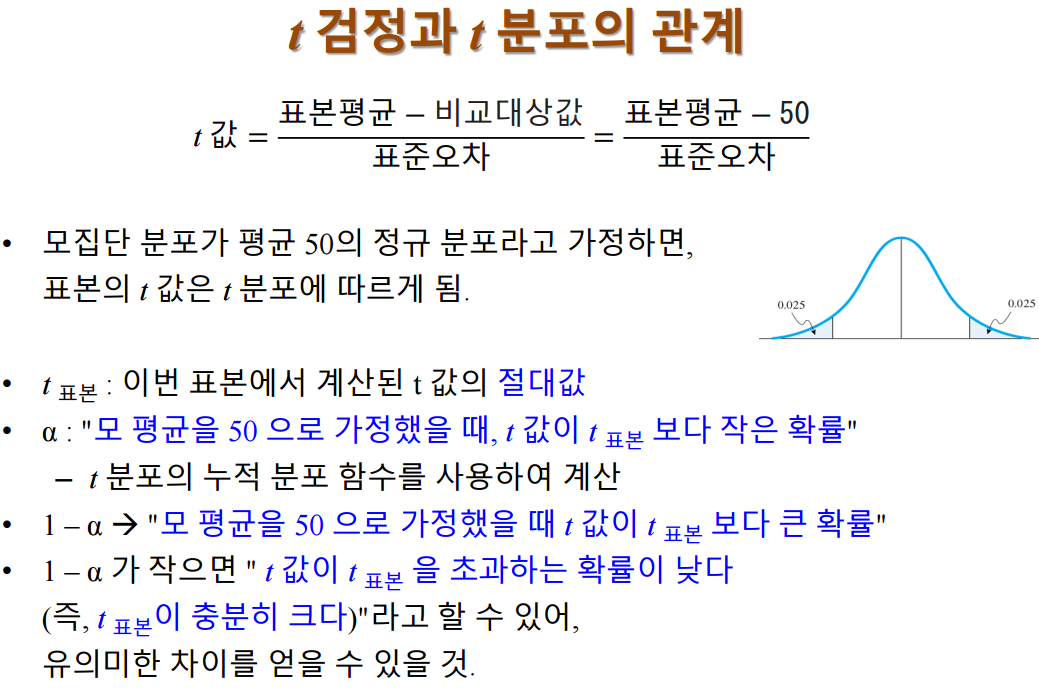

## 단측 검정
### 어떠한 하나의 방향으로만 적합한지를 조사하는 검정, example:A의 평균이 얼마보다 크다.

## 양측 검정
### 어떠한 양쪽의 방향에서 적합한지를 조사하는 검정, example:A의 평균이 얼마보다 다르다.

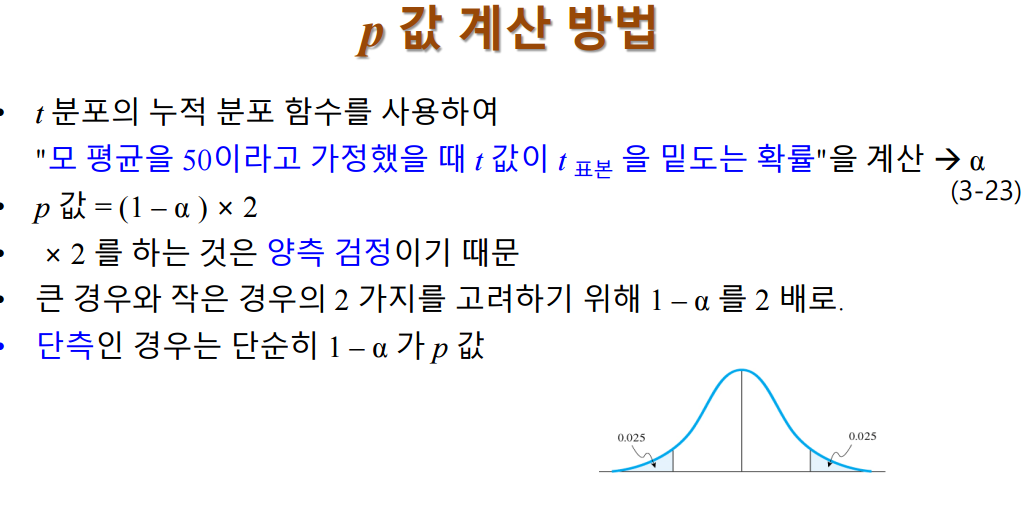

In [4]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
# 그래프를 그리는 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# 표시 자리수의 지정
%precision 3
# 차트를 jupyter Notebook 에 표시하기위한 지정
%matplotlib inline

In [5]:
junk_food = pd.read_csv("3-8-1-junk-food-weight.csv")["weight"]
junk_food.head()


0    58.529820
1    52.353039
2    74.446169
3    52.983263
4    55.876879
Name: weight, dtype: float64

In [7]:
# t값 계산 (표본평균 - 비교대상치) / 표준오
mu = np.mean(junk_food)

#자유도는 샘플크기 -1
df = len(junk_food) - 1

#표준 오차 = "표준 편차 / 샘플 크기의 제곱근"
sigma = np.std(junk_food,  ddof = 1)
se = sigma / np.sqrt(len(junk_food))

#t값은?
t_value = (mu - 50) / se


In [10]:
alpha = stats.t.cdf(t_value, df = df) # 누적분포확률함수
# 알파: t 값이 t 표본보다 작을 확률
(1 - alpha) * 2
# p값 < 유의 수준 0.05 -> 유의미한 차이가 존재한다 판단
# 스낵의 평균 무게는 50g과 유의미하게 다르다고 판단

0.013

In [12]:
stats.ttest_1samp(junk_food, 50) # 그냥 코드로 구한 값


TtestResult(statistic=2.7503396831713434, pvalue=0.012725590012524155, df=19)

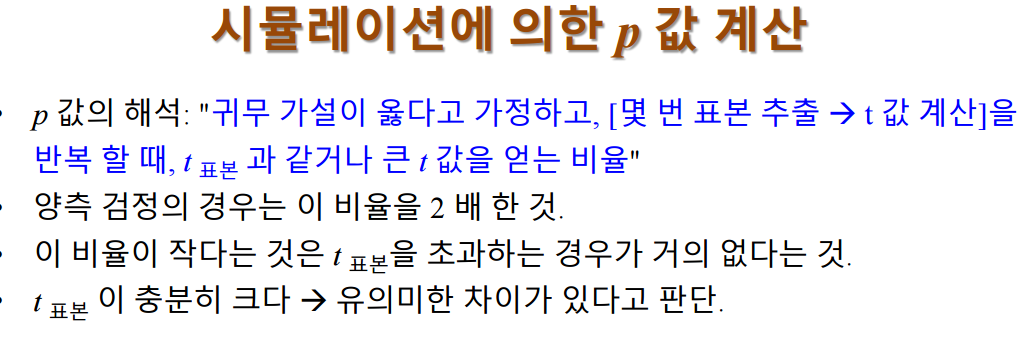

In [13]:
# 샘플 크기와 표준편차
size = len(junk_food)
sigma = np.std(junk_food, ddof = 1)


In [16]:
#시뮬레이션: t 값을 50000 회 계산
t_value_array = np.zeros(50000)
# 5만번 표본 추출 --> t값 계산을 반복함.
np.random.seed(42)
norm_dist = stats.norm(loc = 50, scale = sigma)
for i in range(0, 50000):
    # 샘플링
    sample = norm_dist.rvs(size = size)
    #평균
    sample_mean = np.mean(sample)
    #표준편차
    sample_std = np.std(sample, ddof = 1)
    #표준 오류 standard error
    sample_se = sample_std / np.sqrt(size)
    
    t_value_array[i] = (sample_mean - 50) / sample_se



In [19]:
# p-value = (50000 개의 t 값 중 t 표본 을 상회하는 비율) * 2
(sum(t_value_array > t_value) / 50000) * 2
# 이론적인 값과 유사한 결과를 내보냄.


0.012

# 3.9 평균값의 차이 검정

## t 검정의 종류

### 1표본 t 검정 : 모집단 평균과 한 집단 평균을 서로 비교
### 대응표본 t 검정: 서로 대응이 되는 2개 집단의 차이의 평균을 검정
### 독립표본 t 검정: 다른 2개 집단의 평균의 차이를 검정

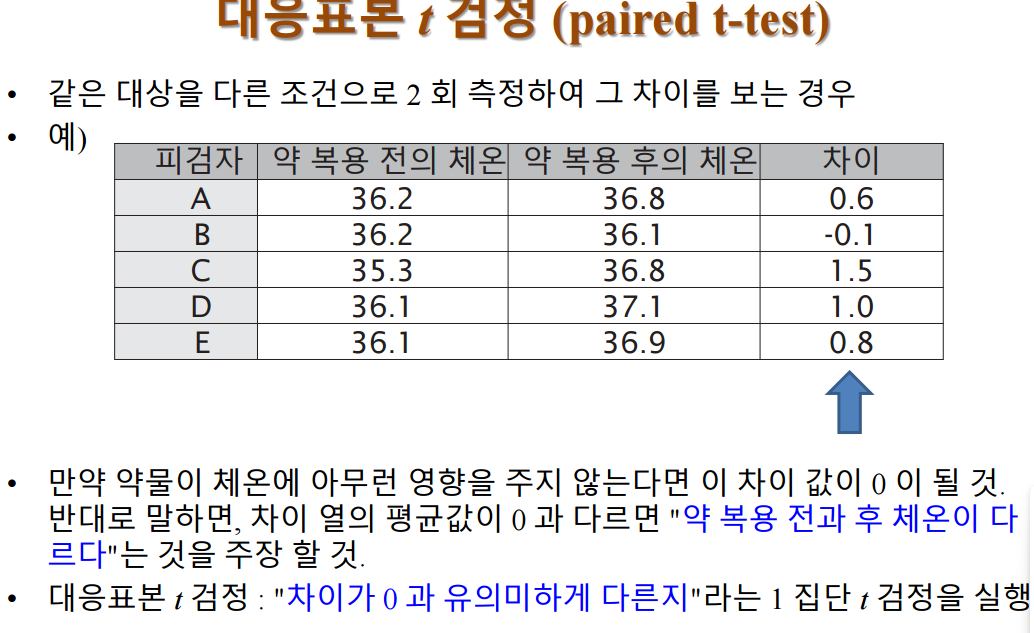

In [20]:
paired_test_data = pd.read_csv("3-9-1-paired-t-test.csv")

'''
귀무 가설: 약 복용 전 후에 체온은 변하지 않는다.
대립 가설: 약 복용 전후의 체온이 다르다.
유의 수준 5%

p값이 0.05 미만이면 대립가설이 유력해짐

'''

'\n귀무 가설: 약 복용 전 후에 체온은 변하지 않는다.\n대립 가설: 약 복용 전후의 체온이 다르다.\n유의 수준 5%\n\np값이 0.05 미만이면 대립가설이 유력해짐\n\n'

In [22]:
# 약을 복용하기 전후 표본 평균
before = paired_test_data.query('medicine == "before"')["body_temperature"]
after = paired_test_data.query('medicine == "after"')["body_temperature"]
# 배열로 변환
before = np.array(before)
after = np.array(after)
# 차이 계산
diff = after - before
diff

array([ 0.6, -0.1,  1.5,  1. ,  0.8])

In [24]:
# 1 집단 t검정으로 평균값과 0 이 다른지 여부 검정

stats.ttest_1samp(diff, 0)
stats.ttest_rel(after, before) # Calculates the T-test on TWO RELATED samples
#0.04임으로 복용전후 유의미한 상관관계가 있음이 명시됨

TtestResult(statistic=2.901693483620596, pvalue=0.044043109730074276, df=4)

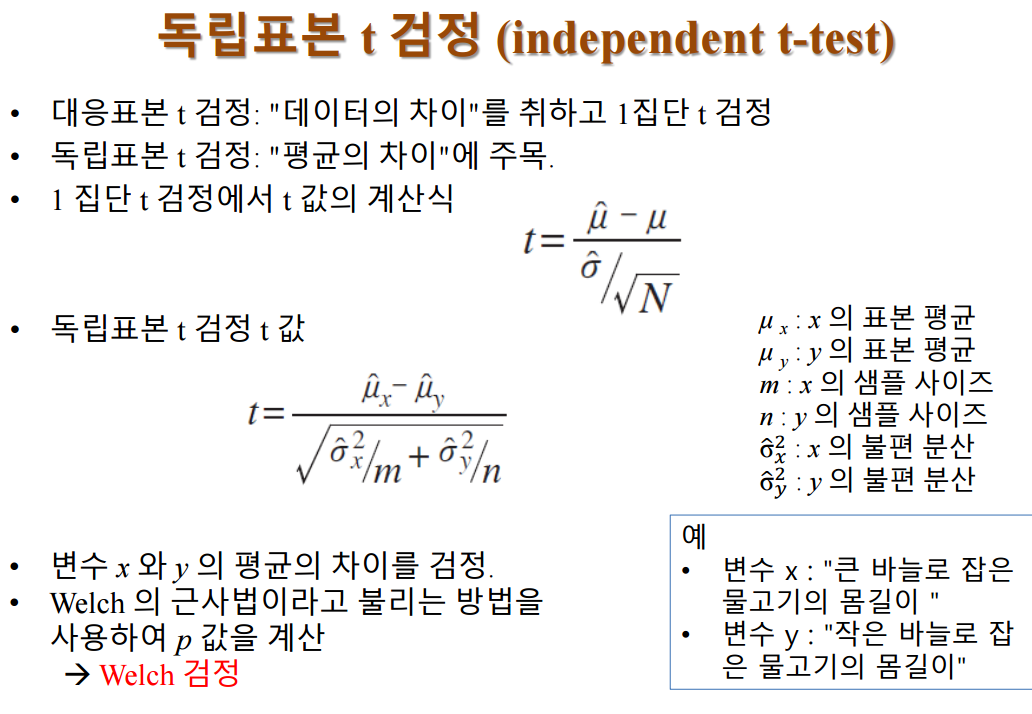

### 독립표본 t 검정 구현
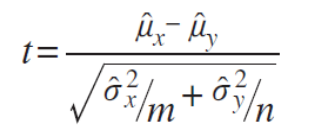

In [25]:
# 평균
mean_bef = np.mean(before)
mean_aft = np.mean(after)
# 분산
sigma_bef = np.var(before, ddof = 1)
sigma_aft = np.var(after, ddof = 1)
# 샘플 크기
m = len(before)
n = len(after)
# t값
t_value = (mean_aft - mean_bef) / np.sqrt((sigma_bef/m + sigma_aft/n))
t_value

3.156

In [26]:
stats.ttest_ind(after, before, equal_var = False)
# p값이 0.01 대임으로, 큰차이가 존재함.

Ttest_indResult(statistic=3.1557282344421034, pvalue=0.013484775682079892)

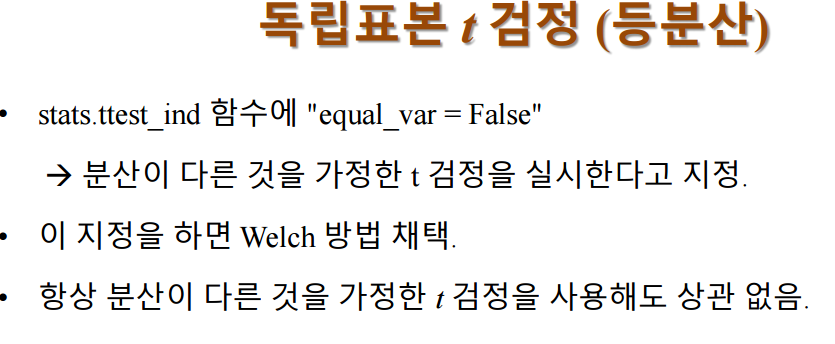
## welch 방법: 독립표본 T 검정에서 등분산성 가정이 충족되지 않을 때 사용됨

## P 해킹
### 분석과정에서 원하는 결과를 얻기 위해서 p 값을 자의적으로 변화시키는 조작
#### 비 도덕적임
#### 주의해야함

# 3.9 분할표 검정 ( 카이제곱분포를 통한 검정)

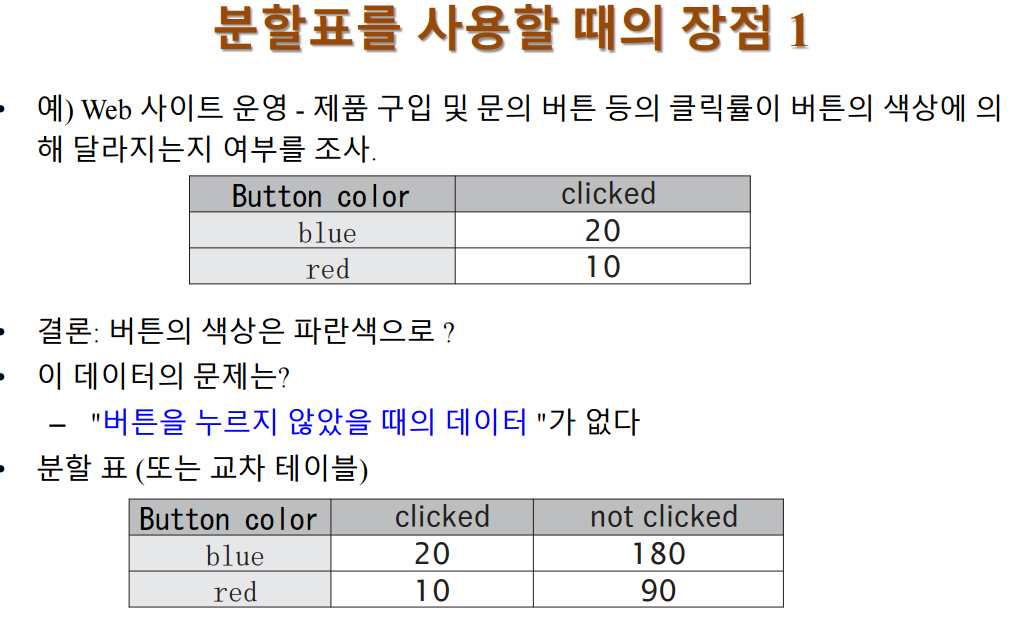

## 분할표
### Contingency tables (also called cross tabulation, crosstabs or two-way tables)
### • 여러 범주형 변수에 대한 관측값의 관계를 요약하고 해석하는데 사용
### • 도수분포표를 2차원으로 확장한 형태
### 이것이 "의미있는"차이라고 할 수 있는지를 통계적 가설 검정을 사용하여
### 결정 → χ2 검정 카이제곱 검정

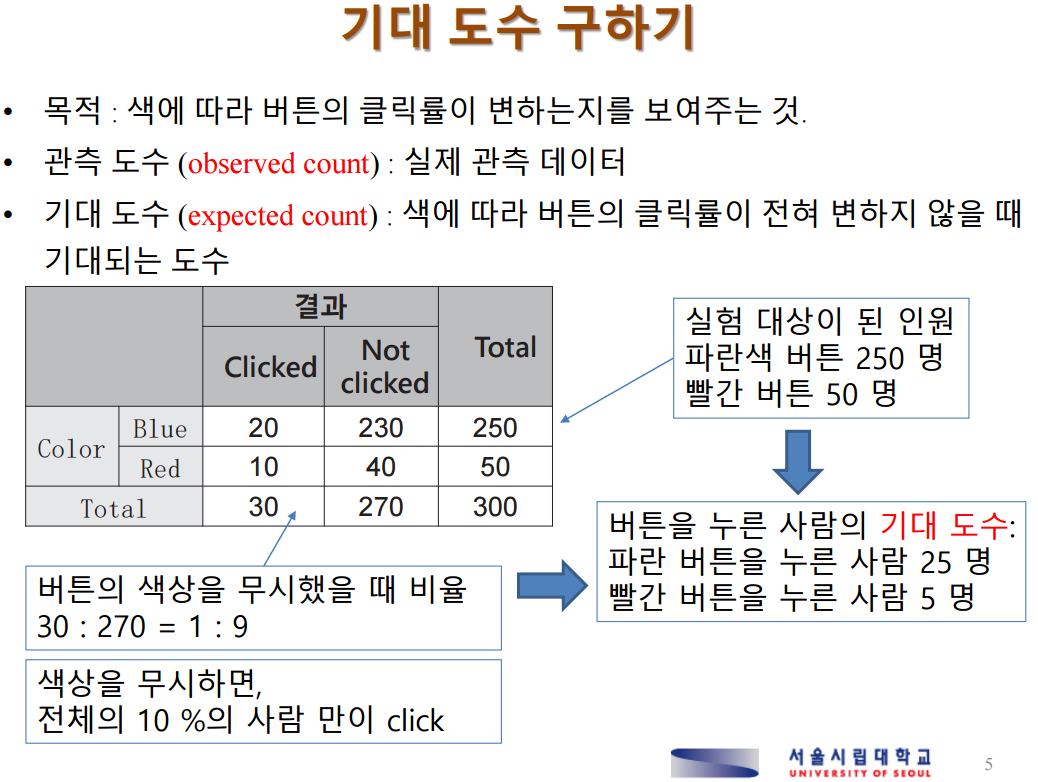

### 기대 도수와 실제 관측 된 도수와의 차이가 크면, 해당 변인이 의미 있는 차이라고 할 수 있음

### χ 2 검정을 실시 할 때는 기대 도수가 모두 5 이상인 것이 요구됨


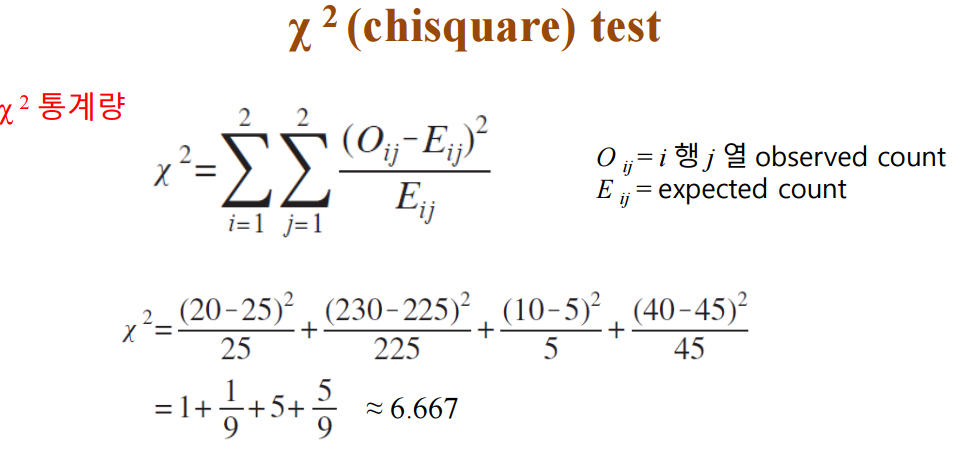

In [29]:
# 자유도 1 의 χ 2 분포의 누적 밀도 함수를 이용하여 p 값 계산
1 - sp.stats.chi2.cdf(x = 6.667, df = 1)
# 0.05 미만으로 이 둘은 유의미한 상관관계가가 있음이 증명되었음.

0.010

In [33]:
click_data = pd.read_csv("3-10-1-click_data.csv")

# 분할 테이블화

cross = pd.pivot_table(
data = click_data,
values = "freq",
aggfunc = "sum",
index = "color",
columns = "click"
)
click_data

,color,click,freq
0,blue,click,20
1,blue,not,230
2,red,click,10
3,red,not,40


In [35]:
sp.stats.chi2_contingency(cross, correction = False)
# • "correction = False"
#    – 불필요한 보정 방지
# • 결과: χ 2 통계량, p 값, 자유도, 기대 도수표 


Chi2ContingencyResult(statistic=6.666666666666666, pvalue=0.009823274507519247, dof=1, expected_freq=array([[ 25., 225.],
       [  5.,  45.]]))

# 3.11 검정 결과 해석

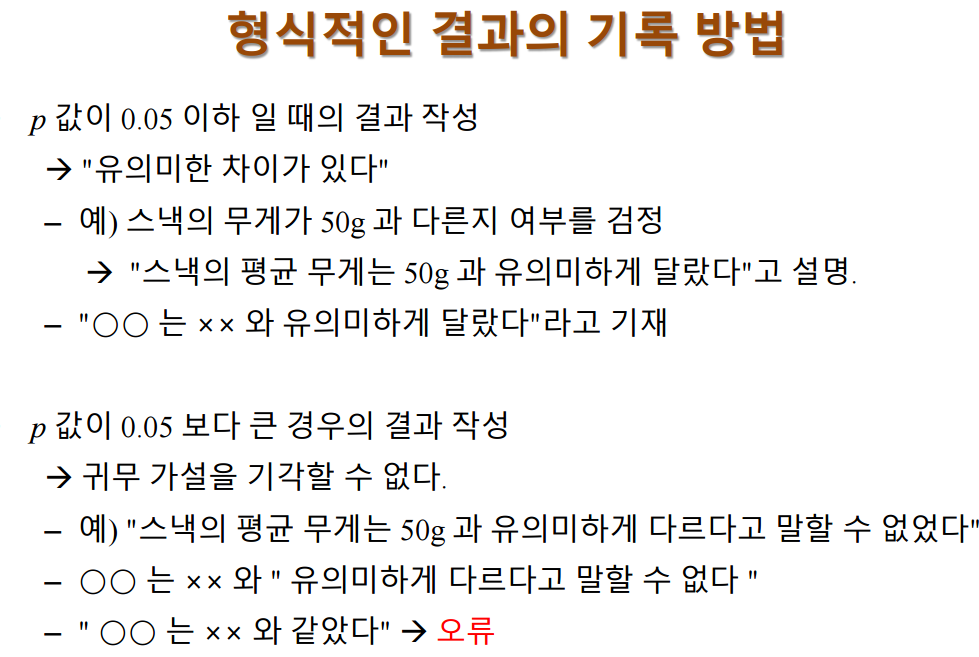

## 가설 검정의 일반적인 실수

### 1. p값이 작은 것이 차이가 크다고 할 수 있다. (X)
### 2. p값이 0.05보다 크므로 차이가 없다고 말할 수 있다. (X)
### 3. "1-p 값"은 "대립 가설이 올바른 확률이 (X)

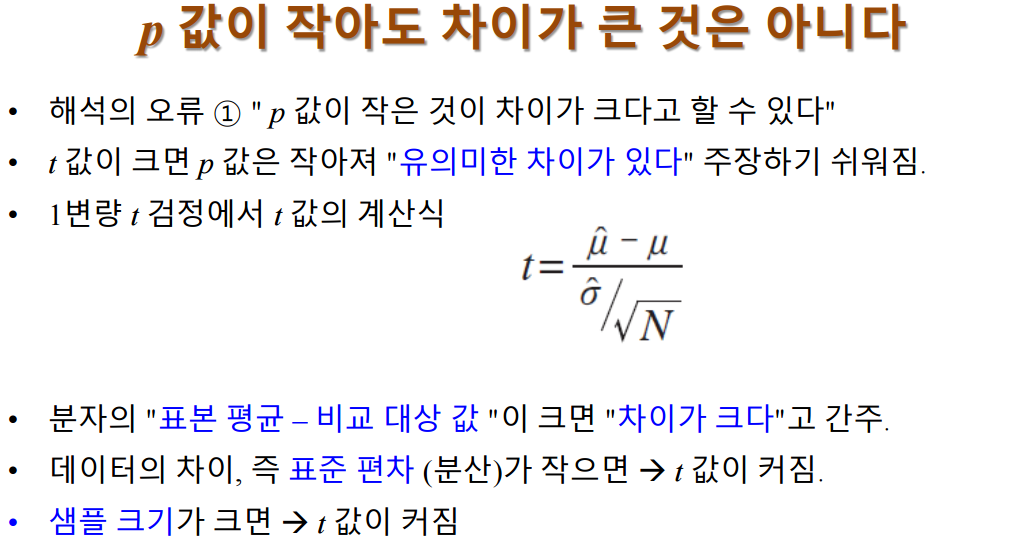

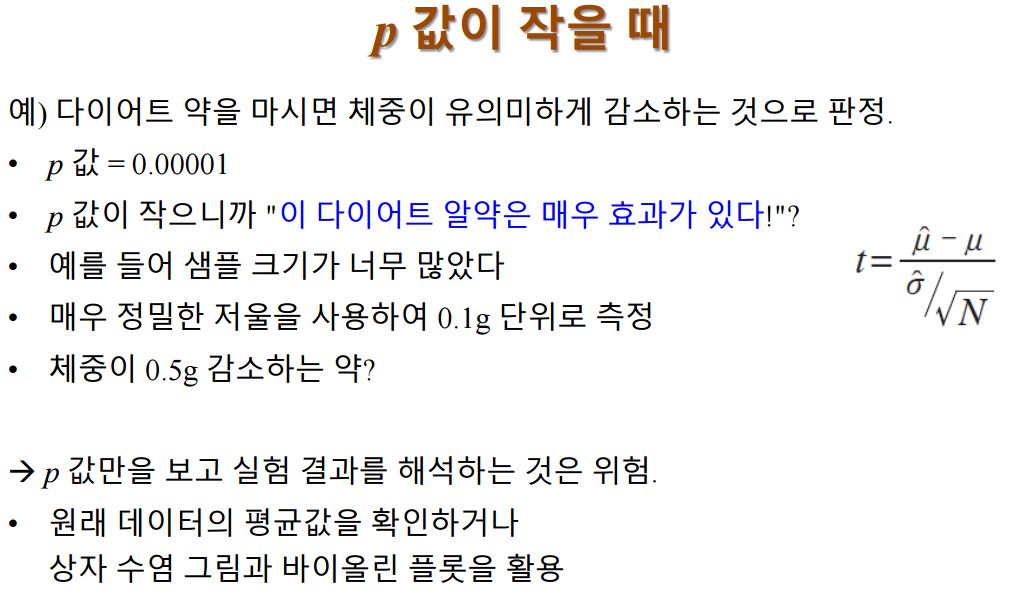

## 제1종 오류・제2종 오류
### • 제1종 오류 : 귀무 가설이 올바른 경우에 실수로 귀무 가설을 기각

### • 제2종 오류 : 귀무 가설이 틀렸는데 실수로 귀무 가설을 채택

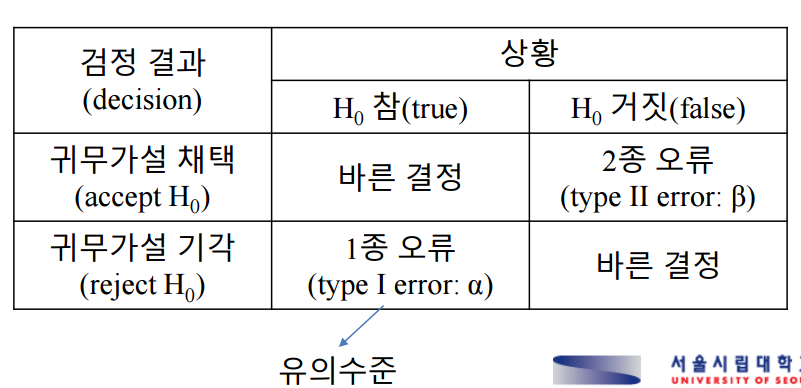


## 검정의 비대칭성

### • 검정 비대칭성 : 제1종 오류에 대해서는 그 확률을 컨트롤하고 있지만, 제2종 오류에 대해서는 제어하지 못하는 것이 원인으로 발생하는 것.

### • 제2종 오류가 일어날 확률 즉 "귀무 가설이 틀렸는데 실수로 귀무 가설을 채택할 확률"은 통계적 가설 검정에서는 컨트롤하지 않음.

### • p 값 계산 시뮬레이션

### 귀무 가설이 옳다고 가정하고 모집단 분포를 설정한 표본 추출

## 가정이 올바른가
### • t검정에서는 모집단분포가 정규분포라고 가정
### • 가정이 충족되지 않으면 p값을 계산하는 것이 불가능